# Horizontal Remapping

So far, the easiest and most efficient way to do horizontal remapping is to use [xESMF](https://xesmf.readthedocs.io/en/latest/), a xarray-friendly python package leveraging the power of [ESMF regridding](https://www.earthsystemcog.org/projects/esmpy/). Different methods are available: bilinear, conservative, patch, nearest neighbor and it can handle periodic grids and north pole fold.

In [1]:
%matplotlib inline

In [2]:
import xarray as xr
import xesmf
import numpy as np

Load our mode dataset:

In [3]:
dataurl = 'http://35.188.34.63:8080/thredds/dodsC/OM4p5/'

ds = xr.open_dataset(f'{dataurl}/ocean_monthly_z.200301-200712.nc4',
                     chunks={'time':1, 'z_l': 1}, drop_variables=['average_DT', 'average_T1', 'average_T2'], engine='pydap')

In [4]:
ds

<xarray.Dataset>
Dimensions:       (nv: 2, time: 60, xh: 720, xq: 720, yh: 576, yq: 576, z_i: 36, z_l: 35)
Coordinates:
  * nv            (nv) float64 1.0 2.0
  * xh            (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * xq            (xq) float64 -299.5 -299.0 -298.5 -298.0 ... 59.0 59.5 60.0
  * yh            (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * yq            (yq) float64 -77.82 -77.63 -77.45 -77.26 ... 89.58 89.79 90.0
  * z_i           (z_i) float64 0.0 5.0 15.0 25.0 ... 5.75e+03 6.25e+03 6.75e+03
  * z_l           (z_l) float64 2.5 10.0 20.0 32.5 ... 5.5e+03 6e+03 6.5e+03
  * time          (time) object 2003-01-16 12:00:00 ... 2007-12-16 12:00:00
Data variables:
    Coriolis      (yq, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    areacello     (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    areacello_bu  (yq, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    areacello_cu  (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    areacello_cv  (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    deptho        (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dxCu          (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dxCv          (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dxt           (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dyCu          (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dyCv          (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dyt           (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolat        (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolat_c      (yq, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolat_u      (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolat_v      (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolon        (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolon_c      (yq, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolon_u      (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolon_v      (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    hfgeou        (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    sftof         (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    thkcello      (z_l, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    wet           (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    wet_c         (yq, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    wet_u         (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    wet_v         (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    so            (time, z_l, yh, xh) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    time_bnds     (time, nv) timedelta64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    thetao        (time, z_l, yh, xh) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    umo           (time, z_l, yh, xq) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    uo            (time, z_l, yh, xq) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    vmo           (time, z_l, yq, xh) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    vo            (time, z_l, yq, xh) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    volcello      (time, z_l, yh, xh) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    zos           (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
Attributes:
    filename:                        ocean_monthly.200301

## Remapping model output to a 1x1 degree grid

Let's write a simple 1x1 degree grid:

In [5]:
grid_1x1 = xr.Dataset()
grid_1x1['lon'] = xr.DataArray(data=0.5 + np.arange(360), dims=('x'))
grid_1x1['lat'] = xr.DataArray(data=0.5 -90 + np.arange(180), dims=('y'))
grid_1x1['lon_b'] = xr.DataArray(data=np.arange(361), dims=('xp'))
grid_1x1['lat_b'] = xr.DataArray(data=-90 + np.arange(181), dims=('yp'))

In [6]:
grid_1x1

<xarray.Dataset>
Dimensions:  (x: 360, xp: 361, y: 180, yp: 181)
Dimensions without coordinates: x, xp, y, yp
Data variables:
    lon      (x) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
    lat      (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    lon_b    (xp) int64 0 1 2 3 4 5 6 7 8 ... 353 354 355 356 357 358 359 360
    lat_b    (yp) int64 -90 -89 -88 -87 -86 -85 -84 -83 ... 84 85 86 87 88 89 90

We also need a grid for the model. The best method is to use the symetric grid output (or infer it from supergrid) so we have a definition
for all cells corner:

In [7]:
grid_model = xr.open_dataset('./data/ocean_grid_sym_OM4_05.nc')

In addition, the coordinates provided in the dataset are not defined on eliminated land processors, which is a no-go! Otherwise, we could have approximated the missing row and column with:

In [8]:
def grid_model_sym_approx(ds):
    grid_model = xr.Dataset()
    grid_model['lon'] = ds['geolon']
    grid_model['lat'] = ds['geolat']

    ny, nx = grid_model['lon'].shape

    lon_b = np.empty((ny+1, nx+1))
    lat_b = np.empty((ny+1, nx+1))

    lon_b[1:, 1:] = ds['geolon_c'].values
    lat_b[1:, 1:] = ds['geolat_c'].values

    # periodicity
    lon_b[:, 0] = 360 - lon_b[:, -1]
    lat_b[:, 0] = lat_b[:, -1]

    # south edge
    dy = (lat_b[2,:] - lat_b[1,:]).mean()
    lat_b[0, 1:] = lat_b[1,1:] - dy
    lon_b[0, 1:] = lon_b[1, 1:]

    # corner point
    lon_b[0, 0] = lon_b[1,0]
    lat_b[0,0] = lat_b[0,1]

    grid_model['lon_b'] = xr.DataArray(data=lon_b, dims=('yq','xq'))
    grid_model['lat_b'] = xr.DataArray(data=lat_b, dims=('yq','xq'))
    return grid_model

In [9]:
grid_model

<xarray.Dataset>
Dimensions:   (xh: 720, xq: 721, yh: 576, yq: 577)
Coordinates:
  * xh        (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * xq        (xq) float64 -300.0 -299.5 -299.0 -298.5 ... 58.5 59.0 59.5 60.0
  * yh        (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * yq        (yq) float64 -78.0 -77.82 -77.63 -77.45 ... 89.37 89.58 89.79 90.0
Data variables:
    geolat    (yh, xh) float32 ...
    geolat_c  (yq, xq) float32 ...
    geolon    (yh, xh) float32 ...
    geolon_c  (yq, xq) float32 ...
Attributes:
    filename:   19000101.ocean_static.nc
    title:      OM4_SIS2_cgrid_05
    grid_type:  regular
    grid_tile:  N/A
    history:    Tue Mar  3 13:41:58 2020: ncks -v geolon,geolon_c,geolat,geol...
    NCO:        4.0.3

Now create the xESMF Regridder (remapping weights):

In [10]:
regrid_to_1x1 = xesmf.Regridder(grid_model.rename({'geolon': 'lon',
                                                   'geolat': 'lat',
                                                   'geolon_c': 'lon_b',
                                                   'geolat_c': 'lat_b',}), grid_1x1, 'conservative', periodic=True)

Create weight file: conservative_576x720_180x360.nc


If the source grid is global, do not forget to set periodic=True. For a regional grid, set to False. We can now remap the data:

In [11]:
thetao_1x1 = regrid_to_1x1(ds['thetao'])

In [12]:
thetao_1x1

<xarray.DataArray 'thetao' (time: 60, z_l: 35, y: 180, x: 360)>
dask.array<regrid_numpy, shape=(60, 35, 180, 360), dtype=float64, chunksize=(1, 1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * time     (time) object 2003-01-16 12:00:00 ... 2007-12-16 12:00:00
    lon      (x) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
    lat      (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: y, x
Attributes:
    regrid_method:  conservative

Let's extract the SST for the first time record:

In [13]:
sst_1x1 = thetao_1x1.isel(time=0, z_l=0)

Since there is no source data below 78S, ESMF fills with zeros. We can easily mask it with a where function:

In [14]:
sst_plt = sst_1x1.where(grid_1x1.lat>grid_model.geolat.min())

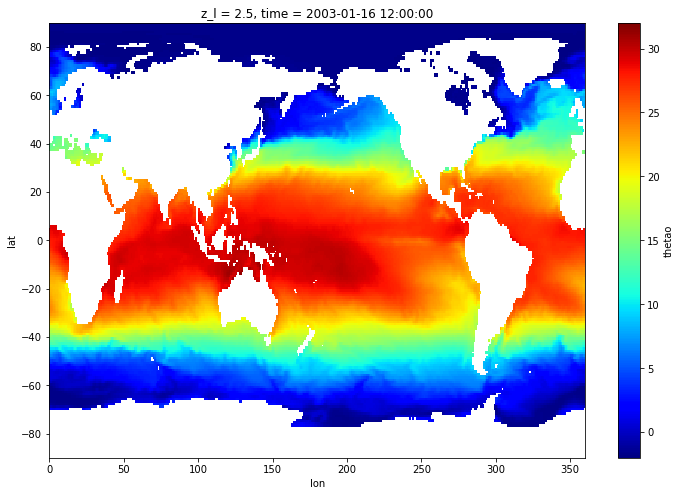

In [15]:
sst_plt.plot(figsize=[12,8], x='lon', y='lat', vmin=-2, vmax=32, cmap='jet')

## Remapping onto the model grid

Let's assume our SST at 1x1 degree is some gridded obs we want to compare on the model, we can remap using xESMF:

In [16]:
regrid_to_model = xesmf.Regridder(grid_1x1, grid_model.rename({'geolon': 'lon',
                                                               'geolat': 'lat',
                                                               'geolon_c': 'lon_b',
                                                               'geolat_c': 'lat_b',}), 'bilinear', periodic=True)

Create weight file: bilinear_180x360_576x720_peri.nc


In [17]:
sst_plt_model = regrid_to_model(sst_plt)

If we compare the obtained result to the original field, we find some discrepancies due to the successive remapping: 

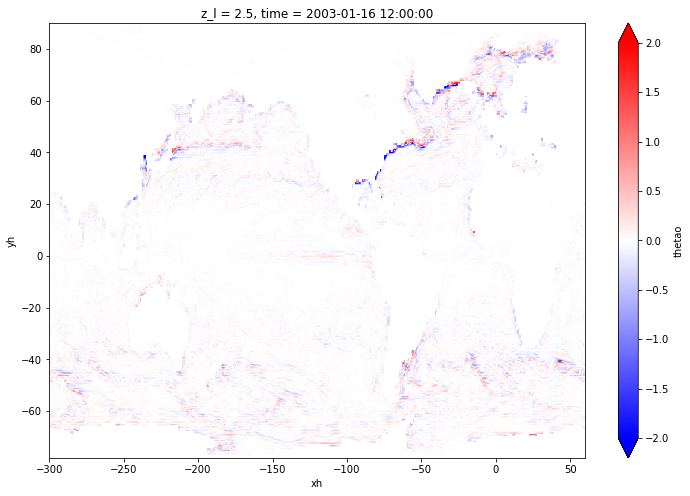

In [18]:
(sst_plt_model - ds['thetao'].isel(time=0, z_l=0)).plot(figsize=[12,8], x='xh', y='yh', vmin=-2, vmax=2, cmap='bwr')

There is a lot you can do with xESMF. Refer to the documentation for more examples.